In [34]:
from module_behavioral.dataloader import DataLoader
from module_behavioral.analysis import reduce_dimensions

import numpy as np
from matplotlib import pyplot as plt


In [35]:
## load emotion and color data from experiment one
d = DataLoader(context=1, location='../data/behavioral/processeddata/1/')
d.load_color()
d.load_emotion()

In [36]:
## reduce the similarity matrix to 2 dimensions
color_embedding = reduce_dimensions(d.average_color_matrix, 2)
emotion_embedding = reduce_dimensions(d.average_emotion_matrix, 2)

In [37]:
## set matplotlib style
plt.style.use('./module_behavioral/figures.style')

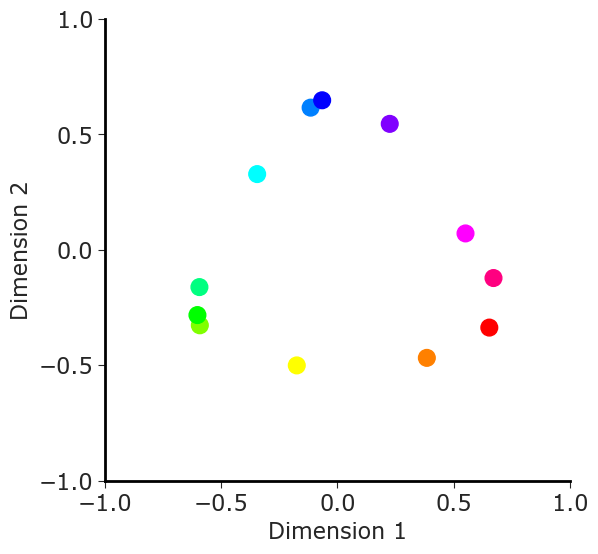

In [40]:
## Figure 1A.
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(color_embedding[:, 0], color_embedding[:, 1], c=d.color_values)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
#ax.set_title('Fig 1A.')
plt.locator_params(nbins=4)
plt.savefig('../figures/1A.svg', dpi=600,bbox_inches='tight')

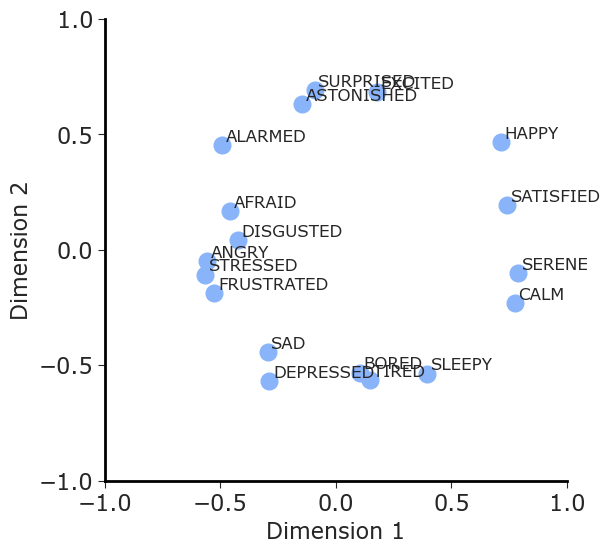

In [41]:
## Figure 1B.
fig,ax = plt.subplots(figsize=(6,6))
ax.scatter(emotion_embedding[:, 0], emotion_embedding[:, 1])
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
plt.locator_params(nbins=4)
#annotate each point with emotion
ax.set_aspect('equal')

for i in range(0, len(d.emotion)):
    x = d.emotion[i]
    plt.annotate(str(x),
                 (emotion_embedding[i, 0], emotion_embedding[i, 1]),
                 textcoords="offset points",
                 xytext=(2.5, 2.5),
                 ha='left',fontsize=12)

#ax.set_title('Fig 1B.')
plt.savefig('../figures/1B.svg', dpi=600,bbox_inches='tight')